<a href="https://colab.research.google.com/github/Sihamharimech1/Weather-collab/blob/main/updated_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import requests

# TensorFlow LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# For scaling features
from sklearn.preprocessing import MinMaxScaler

# Create folders
os.makedirs("datasets", exist_ok=True)
os.makedirs("models", exist_ok=True)


In [2]:
cities = {
    "Casablanca": (33.5731, -7.5898),
    "Rabat": (34.0209, -6.8416),
    "Fes": (34.0331, -5.0003),
    "Marrakech": (31.6295, -7.9811),
    "Tangier": (35.7595, -5.8340),
    "Agadir": (30.4278, -9.5981),
    "Oujda": (34.6814, -1.9086),
    "Kenitra": (34.2610, -6.5802),
    "Tetouan": (35.5889, -5.3626),
    "Safi": (32.2994, -9.2372),
    "El_Jadida": (33.2549, -8.5060),
    "Beni_Mellal": (32.3373, -6.3498),
    "Khouribga": (32.8811, -6.9063),
    "Nador": (35.1681, -2.9335),
    "Laayoune": (27.1536, -13.2033),
    "Dakhla": (23.6848, -15.9570)
}


In [3]:
from datetime import datetime, timedelta
import pandas as pd
import os
import requests

# Ensure folder exists
os.makedirs("datasets", exist_ok=True)

# Dates
start_date = datetime(2024, 1, 1)
end_date = datetime.today() - timedelta(days=1)  # yesterday

def fetch_open_meteo(city, lat, lon, start, end):
    url = f"https://archive-api.open-meteo.com/v1/archive?" \
          f"latitude={lat}&longitude={lon}" \
          f"&start_date={start.date()}&end_date={end.date()}" \
          f"&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean," \
          f"precipitation_sum,relative_humidity_2m_mean&timezone=GMT"

    r = requests.get(url)
    print(f"Status code for {city}: {r.status_code}")
    print("Raw response snippet:", r.text[:500])  # first 500 chars

    try:
        data = r.json()
    except Exception as e:
        print(f"JSON decode error for {city}: {e}")
        return None

    if "daily" not in data:
        print(f"No daily data for {city} — response:\n", data)
        return None

    df = pd.DataFrame({
        "date": data["daily"]["time"],
        "tmax": data["daily"]["temperature_2m_max"],
        "tmin": data["daily"]["temperature_2m_min"],
        "tavg": data["daily"]["temperature_2m_mean"],
        "prcp": data["daily"]["precipitation_sum"],
        "rhum": data["daily"]["relative_humidity_2m_mean"]
    })

    df = df.interpolate().dropna()
    df.to_csv(f"datasets/{city.lower()}.csv", index=False)
    print(f"Saved dataset for {city} ({len(df)} rows)")
    return df

# Loop through all cities
for city, (lat, lon) in cities.items():
    fetch_open_meteo(city, lat, lon, start_date, end_date)


Status code for Casablanca: 200
Raw response snippet: {"latitude":33.56766,"longitude":-7.5836487,"generationtime_ms":71.08604907989502,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":44.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for Casablanca (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Rabat: 200
Raw response snippet: {"latitude":33.989452,"longitude":-6.8539124,"generationtime_ms":99.73752498626709,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":18.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Rabat (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Fes: 200
Raw response snippet: {"latitude":34.059753,"longitude":-4.950012,"generationtime_ms":1211.440086364746,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":405.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Fes (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Marrakech: 200
Raw response snippet: {"latitude":31.599297,"longitude":-7.976074,"generationtime_ms":62.36279010772705,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":469.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Marrakech (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Tangier: 200
Raw response snippet: {"latitude":35.74692,"longitude":-5.7989807,"generationtime_ms":146.12293243408203,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":48.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Tangier (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Agadir: 200
Raw response snippet: {"latitude":30.474516,"longitude":-9.623993,"generationtime_ms":70.82438468933105,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":62.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for Agadir (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Oujda: 200
Raw response snippet: {"latitude":34.69244,"longitude":-1.9342651,"generationtime_ms":74.10955429077148,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":552.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Oujda (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Kenitra: 200
Raw response snippet: {"latitude":34.27065,"longitude":-6.5495605,"generationtime_ms":72.74580001831055,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":11.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for Kenitra (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Tetouan: 200
Raw response snippet: {"latitude":35.606327,"longitude":-5.32135,"generationtime_ms":50.5138635635376,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":141.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","20
Saved dataset for Tetouan (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Safi: 200
Raw response snippet: {"latitude":32.37258,"longitude":-9.283997,"generationtime_ms":70.06096839904785,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":35.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","20
Saved dataset for Safi (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for El_Jadida: 200
Raw response snippet: {"latitude":33.216167,"longitude":-8.534485,"generationtime_ms":92.70298480987549,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":10.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for El_Jadida (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Beni_Mellal: 200
Raw response snippet: {"latitude":32.37258,"longitude":-6.334961,"generationtime_ms":26.224255561828613,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":533.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Beni_Mellal (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Khouribga: 200
Raw response snippet: {"latitude":32.864674,"longitude":-6.9400024,"generationtime_ms":73.64678382873535,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":802.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11",
Saved dataset for Khouribga (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Nador: 200
Raw response snippet: {"latitude":35.184532,"longitude":-2.9847107,"generationtime_ms":77.75640487670898,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":24.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Nador (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Laayoune: 200
Raw response snippet: {"latitude":27.170473,"longitude":-13.229401,"generationtime_ms":74.37026500701904,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":69.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Laayoune (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Dakhla: 200
Raw response snippet: {"latitude":23.585236,"longitude":-15.837738,"generationtime_ms":976.5832424163818,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":8.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for Dakhla (748 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import joblib

# ======================
# Parameters
# ======================
FEATURES = ["tavg", "tmin", "tmax", "prcp", "rhum"]
PAST_DAYS = 30
FUTURE_DAYS = 15

DATA_DIR = "datasets"
MODEL_DIR = "models"
SCALER_DIR = "scalers"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(SCALER_DIR, exist_ok=True)

# ======================
# Helper functions
# ======================
def create_sequences(data, past_days, future_days):
    X, y = [], []
    for i in range(len(data) - past_days - future_days + 1):
        X.append(data[i:i + past_days])
        y.append(data[i + past_days:i + past_days + future_days])
    return np.array(X), np.array(y)

def inverse_scale(scaled_data, scaler):
    reshaped = scaled_data.reshape(-1, scaled_data.shape[-1])
    inversed = scaler.inverse_transform(reshaped)
    return inversed.reshape(scaled_data.shape)

# ======================
# Training loop
# ======================
for file in os.listdir(DATA_DIR):
    if not file.endswith(".csv"):
        continue

    city = file.replace(".csv", "").lower()
    print(f"\n============================")
    print(f"Training model for {city}")
    print(f"============================")

    # Load & sort
    df = pd.read_csv(os.path.join(DATA_DIR, file), parse_dates=["date"])
    df = df.sort_values("date").reset_index(drop=True)
    values = df[FEATURES].values

    # ======================
    # Scale (fit on ALL data – acceptable for this stage)
    # ======================
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(values)
    joblib.dump(scaler, os.path.join(SCALER_DIR, f"{city}_scaler.save"))

    # ======================
    # Create sequences
    # ======================
    X, y = create_sequences(scaled_values, PAST_DAYS, FUTURE_DAYS)

    # ======================
    # Train / Val / Test split (70 / 15 / 15)
    # ======================
    n_total = len(X)
    train_end = int(0.7 * n_total)
    val_end   = int(0.85 * n_total)

    X_train, y_train = X[:train_end], y[:train_end]
    X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
    X_test,  y_test  = X[val_end:], y[val_end:]

    print(f"Samples → Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

    # ======================
    # 2-layer LSTM model
    # ======================
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(PAST_DAYS, len(FEATURES))),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(FUTURE_DAYS * len(FEATURES)),
        Reshape((FUTURE_DAYS, len(FEATURES)))
    ])

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"]
    )

    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )

    # ======================
    # Train (ONLY train + val used)
    # ======================
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )

    # ======================
    # FINAL TEST EVALUATION (scaled)
    # ======================
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    test_rmse = np.sqrt(test_loss)

    print("\n📊 TEST Metrics (scaled)")
    print(f"MAE : {test_mae:.4f}")
    print(f"RMSE: {test_rmse:.4f}")

    # ======================
    # FINAL TEST EVALUATION (real-world)
    # ======================
    y_test_pred = model.predict(X_test, verbose=0)

    y_test_real = inverse_scale(y_test, scaler)
    y_pred_real = inverse_scale(y_test_pred, scaler)

    print("\n📊 TEST Metrics (real-world per feature)")
    for i, feature in enumerate(FEATURES):
        mae = np.mean(np.abs(y_pred_real[:, :, i] - y_test_real[:, :, i]))
        rmse = np.sqrt(np.mean((y_pred_real[:, :, i] - y_test_real[:, :, i]) ** 2))
        print(f"{feature.upper():5s} → MAE: {mae:.3f} | RMSE: {rmse:.3f}")

    # ======================
    # Save model
    # ======================
    model.save(os.path.join(MODEL_DIR, f"{city}.keras"))
    print(f"\n✅ Model & scaler saved for {city}")



Training model for rabat
Samples → Train: 492, Val: 106, Test: 106


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.2179 - mae: 0.3844 - val_loss: 0.1941 - val_mae: 0.3735
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1166 - mae: 0.2666 - val_loss: 0.0762 - val_mae: 0.2185
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0612 - mae: 0.1913 - val_loss: 0.0379 - val_mae: 0.1457
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0419 - mae: 0.1583 - val_loss: 0.0283 - val_mae: 0.1191
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0349 - mae: 0.1439 - val_loss: 0.0258 - val_mae: 0.1145
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0296 - mae: 0.1324 - val_loss: 0.0228 - val_mae: 0.1040
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0280 - mae: 0.1279 - val_loss: 0.0209 - val_mae: 0.0981
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0252 - mae: 0.1212 - val_loss: 0.0197 - val_mae: 0.0937
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.025

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.2004 - mae: 0.3666 - val_loss: 0.1911 - val_mae: 0.3700
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1074 - mae: 0.2564 - val_loss: 0.0977 - val_mae: 0.2523
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0609 - mae: 0.1904 - val_loss: 0.0575 - val_mae: 0.1889
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0457 - mae: 0.1648 - val_loss: 0.0474 - val_mae: 0.1687
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0395 - mae: 0.1536 - val_loss: 0.0389 - val_mae: 0.1513
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0351 - mae: 0.1448 - val_loss: 0.0329 - val_mae: 0.1388
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0314 - mae: 0.1367 - val_loss: 0.0278 - val_mae: 0.1260
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0295 - mae: 0.1323 - val_loss: 0.0244 - val_mae: 0.1174
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0274 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.1794 - mae: 0.3461 - val_loss: 0.1734 - val_mae: 0.3435
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1043 - mae: 0.2512 - val_loss: 0.0887 - val_mae: 0.2359
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0617 - mae: 0.1895 - val_loss: 0.0520 - val_mae: 0.1724
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0464 - mae: 0.1636 - val_loss: 0.0428 - val_mae: 0.1573
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0413 - mae: 0.1562 - val_loss: 0.0437 - val_mae: 0.1586
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0372 - mae: 0.1470 - val_loss: 0.0428 - val_mae: 0.1578
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0360 - mae: 0.1445 - val_loss: 0.0371 - val_mae: 0.1452
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0341 - mae: 0.1410 - val_loss: 0.0396 - val_mae: 0.1504
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0330 - mae: 0.


📊 TEST Metrics (real-world per feature)
TAVG  → MAE: 3.834 | RMSE: 4.480
TMIN  → MAE: 2.677 | RMSE: 3.173
TMAX  → MAE: 5.302 | RMSE: 6.269
PRCP  → MAE: 1.753 | RMSE: 4.106
RHUM  → MAE: 16.228 | RMSE: 18.347

✅ Model & scaler saved for khouribga

Training model for el_jadida
Samples → Train: 492, Val: 106, Test: 106
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.2281 - mae: 0.3994 - val_loss: 0.2006 - val_mae: 0.3790
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1149 - mae: 0.2664 - val_loss: 0.0750 - val_mae: 0.2227
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0573 - mae: 0.1870 - val_loss: 0.0367 - val_mae: 0.1558
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0414 - mae: 0.1574 - val_loss: 0.0199 - val_mae: 0.1088
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0332 - mae: 0.1401 - val_loss: 0.0208 - val_mae: 0.1114
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0290 - mae: 0.1307 - val_loss: 0.0164 - val_mae: 0.0957
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0258 - mae: 0.1230 - val_loss: 0.0151 - val_mae: 0.0901
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0247 - mae: 0.1201 - val_loss: 0.0132 - val_mae: 0.0824
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0235 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.1806 - mae: 0.3529 - val_loss: 0.1933 - val_mae: 0.3551
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0938 - mae: 0.2380 - val_loss: 0.0984 - val_mae: 0.2442
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0520 - mae: 0.1740 - val_loss: 0.0522 - val_mae: 0.1738
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0392 - mae: 0.1508 - val_loss: 0.0391 - val_mae: 0.1503
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0334 - mae: 0.1395 - val_loss: 0.0365 - val_mae: 0.1455
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0308 - mae: 0.1337 - val_loss: 0.0301 - val_mae: 0.1298
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0283 - mae: 0.1281 - val_loss: 0.0345 - val_mae: 0.1412
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0278 - mae: 0.1270 - val_loss: 0.0253 - val_mae: 0.1167
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0269 - mae: 0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.2012 - mae: 0.3763 - val_loss: 0.2162 - val_mae: 0.3903
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1201 - mae: 0.2703 - val_loss: 0.1001 - val_mae: 0.2525
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0688 - mae: 0.2001 - val_loss: 0.0452 - val_mae: 0.1630
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0465 - mae: 0.1647 - val_loss: 0.0327 - val_mae: 0.1428
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0384 - mae: 0.1505 - val_loss: 0.0280 - val_mae: 0.1313
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0354 - mae: 0.1437 - val_loss: 0.0222 - val_mae: 0.1128
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0330 - mae: 0.1393 - val_loss: 0.0203 - val_mae: 0.1088
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0323 - mae: 0.1374 - val_loss: 0.0184 - val_mae: 0.1031
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0300 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.1835 - mae: 0.3501 - val_loss: 0.1457 - val_mae: 0.3078
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0889 - mae: 0.2327 - val_loss: 0.0675 - val_mae: 0.1978
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0484 - mae: 0.1706 - val_loss: 0.0369 - val_mae: 0.1430
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0346 - mae: 0.1439 - val_loss: 0.0275 - val_mae: 0.1194
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0306 - mae: 0.1344 - val_loss: 0.0242 - val_mae: 0.1098
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0271 - mae: 0.1273 - val_loss: 0.0231 - val_mae: 0.1066
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0242 - mae: 0.1185 - val_loss: 0.0221 - val_mae: 0.1031
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0236 - mae: 0.1181 - val_loss: 0.0215 - val_mae: 0.1016
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0226 - mae: 0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.1890 - mae: 0.3469 - val_loss: 0.1383 - val_mae: 0.2923
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0977 - mae: 0.2398 - val_loss: 0.0609 - val_mae: 0.1839
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0538 - mae: 0.1773 - val_loss: 0.0343 - val_mae: 0.1331
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0416 - mae: 0.1547 - val_loss: 0.0244 - val_mae: 0.1085
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0356 - mae: 0.1419 - val_loss: 0.0201 - val_mae: 0.0960
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0324 - mae: 0.1353 - val_loss: 0.0216 - val_mae: 0.0990
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0319 - mae: 0.1336 - val_loss: 0.0181 - val_mae: 0.0874
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0307 - mae: 0.1306 - val_loss: 0.0163 - val_mae: 0.0832
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0288 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.2027 - mae: 0.3729 - val_loss: 0.2153 - val_mae: 0.3854
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1069 - mae: 0.2535 - val_loss: 0.0869 - val_mae: 0.2281
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0589 - mae: 0.1856 - val_loss: 0.0424 - val_mae: 0.1622
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0442 - mae: 0.1613 - val_loss: 0.0403 - val_mae: 0.1626
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0374 - mae: 0.1477 - val_loss: 0.0285 - val_mae: 0.1337
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0361 - mae: 0.1445 - val_loss: 0.0228 - val_mae: 0.1187
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0331 - mae: 0.1385 - val_loss: 0.0223 - val_mae: 0.1168
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0302 - mae: 0.1320 - val_loss: 0.0197 - val_mae: 0.1089
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0296 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.1996 - mae: 0.3709 - val_loss: 0.1613 - val_mae: 0.3307
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0862 - mae: 0.2262 - val_loss: 0.0790 - val_mae: 0.2285
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0508 - mae: 0.1733 - val_loss: 0.0610 - val_mae: 0.1996
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0407 - mae: 0.1552 - val_loss: 0.0492 - val_mae: 0.1738
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0332 - mae: 0.1390 - val_loss: 0.0438 - val_mae: 0.1603
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0315 - mae: 0.1349 - val_loss: 0.0408 - val_mae: 0.1527
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0290 - mae: 0.1300 - val_loss: 0.0389 - val_mae: 0.1476
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0283 - mae: 0.1281 - val_loss: 0.0354 - val_mae: 0.1398
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.024

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1921 - mae: 0.3612 - val_loss: 0.1736 - val_mae: 0.3430
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1024 - mae: 0.2522 - val_loss: 0.0751 - val_mae: 0.2093
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0515 - mae: 0.1753 - val_loss: 0.0359 - val_mae: 0.1394
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0346 - mae: 0.1434 - val_loss: 0.0260 - val_mae: 0.1107
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0280 - mae: 0.1284 - val_loss: 0.0231 - val_mae: 0.1024
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0261 - mae: 0.1249 - val_loss: 0.0248 - val_mae: 0.1091
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0236 - mae: 0.1173 - val_loss: 0.0237 - val_mae: 0.1053
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0228 - mae: 0.1142 - val_loss: 0.0205 - val_mae: 0.0933
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0221 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.2279 - mae: 0.4011 - val_loss: 0.2006 - val_mae: 0.3768
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1124 - mae: 0.2609 - val_loss: 0.0938 - val_mae: 0.2508
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0633 - mae: 0.1932 - val_loss: 0.0435 - val_mae: 0.1546
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0464 - mae: 0.1647 - val_loss: 0.0335 - val_mae: 0.1335
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0400 - mae: 0.1536 - val_loss: 0.0312 - val_mae: 0.1288
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0355 - mae: 0.1436 - val_loss: 0.0279 - val_mae: 0.1174
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0322 - mae: 0.1374 - val_loss: 0.0303 - val_mae: 0.1309
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0299 - mae: 0.1318 - val_loss: 0.0262 - val_mae: 0.1188
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0284 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.2085 - mae: 0.3761 - val_loss: 0.1785 - val_mae: 0.3487
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1021 - mae: 0.2493 - val_loss: 0.0760 - val_mae: 0.2142
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0529 - mae: 0.1786 - val_loss: 0.0400 - val_mae: 0.1463
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0381 - mae: 0.1510 - val_loss: 0.0278 - val_mae: 0.1145
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0321 - mae: 0.1379 - val_loss: 0.0270 - val_mae: 0.1117
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0296 - mae: 0.1315 - val_loss: 0.0242 - val_mae: 0.1035
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0267 - mae: 0.1241 - val_loss: 0.0243 - val_mae: 0.1030
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0258 - mae: 0.1225 - val_loss: 0.0228 - val_mae: 0.0989
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0240 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1991 - mae: 0.3623 - val_loss: 0.1578 - val_mae: 0.3257
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1037 - mae: 0.2468 - val_loss: 0.0615 - val_mae: 0.1925
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0613 - mae: 0.1881 - val_loss: 0.0330 - val_mae: 0.1361
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0449 - mae: 0.1611 - val_loss: 0.0308 - val_mae: 0.1340
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0375 - mae: 0.1475 - val_loss: 0.0260 - val_mae: 0.1187
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0342 - mae: 0.1410 - val_loss: 0.0242 - val_mae: 0.1149
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0303 - mae: 0.1322 - val_loss: 0.0262 - val_mae: 0.1216
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0286 - mae: 0.1283 - val_loss: 0.0192 - val_mae: 0.0956
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0272 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.1663 - mae: 0.3287 - val_loss: 0.0967 - val_mae: 0.2436
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0758 - mae: 0.2121 - val_loss: 0.0437 - val_mae: 0.1594
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0425 - mae: 0.1588 - val_loss: 0.0287 - val_mae: 0.1261
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0330 - mae: 0.1400 - val_loss: 0.0235 - val_mae: 0.1078
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0297 - mae: 0.1302 - val_loss: 0.0201 - val_mae: 0.0948
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0257 - mae: 0.1203 - val_loss: 0.0216 - val_mae: 0.1018
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0247 - mae: 0.1173 - val_loss: 0.0184 - val_mae: 0.0868
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0232 - mae: 0.1141 - val_loss: 0.0183 - val_mae: 0.0872
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0222 - mae: 0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.1592 - mae: 0.3222 - val_loss: 0.1501 - val_mae: 0.3096
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0855 - mae: 0.2218 - val_loss: 0.0702 - val_mae: 0.1995
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0484 - mae: 0.1689 - val_loss: 0.0424 - val_mae: 0.1479
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0340 - mae: 0.1410 - val_loss: 0.0365 - val_mae: 0.1318
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0301 - mae: 0.1309 - val_loss: 0.0311 - val_mae: 0.1141
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0264 - mae: 0.1225 - val_loss: 0.0306 - val_mae: 0.1118
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0250 - mae: 0.1183 - val_loss: 0.0303 - val_mae: 0.1096
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0247 - mae: 0.1173 - val_loss: 0.0291 - val_mae: 0.1059
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0232 - mae: 0.

In [5]:
import joblib
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure scaler folder exists
os.makedirs("scalers", exist_ok=True)

features = ["tavg", "tmin", "tmax", "prcp", "rhum"]

for city_file in os.listdir("datasets"):
    if not city_file.endswith(".csv"):
        continue
    city = city_file.replace(".csv", "")

    # Load CSV
    df = pd.read_csv(f"datasets/{city_file}")
    df['date'] = pd.to_datetime(df['date'])
    df[features] = df[features].astype(float)
    df = df.interpolate().dropna()

    # Fit scaler
    scaler = MinMaxScaler()
    scaler.fit(df[features])

    # Save scaler
    joblib.dump(scaler, f"scalers/{city}_scaler.save")
    print(f"Saved scaler for {city}")


Saved scaler for rabat
Saved scaler for fes
Saved scaler for khouribga
Saved scaler for el_jadida
Saved scaler for marrakech
Saved scaler for oujda
Saved scaler for casablanca
Saved scaler for dakhla
Saved scaler for beni_mellal
Saved scaler for tangier
Saved scaler for safi
Saved scaler for tetouan
Saved scaler for kenitra
Saved scaler for nador
Saved scaler for laayoune
Saved scaler for agadir


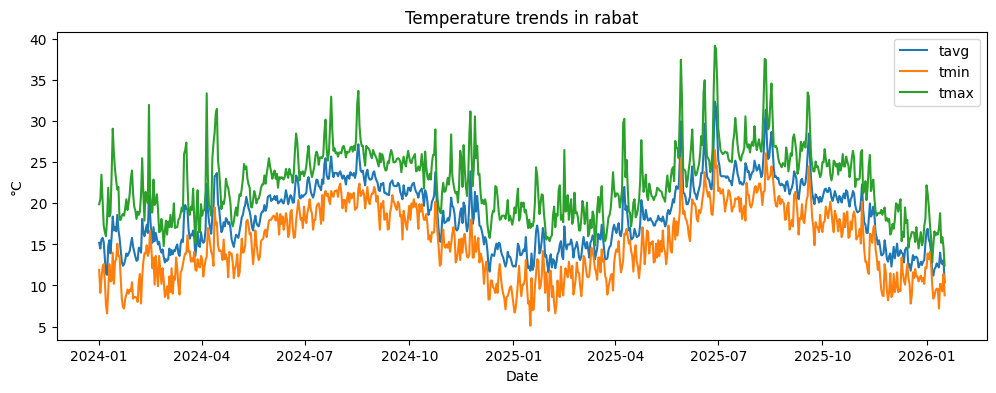

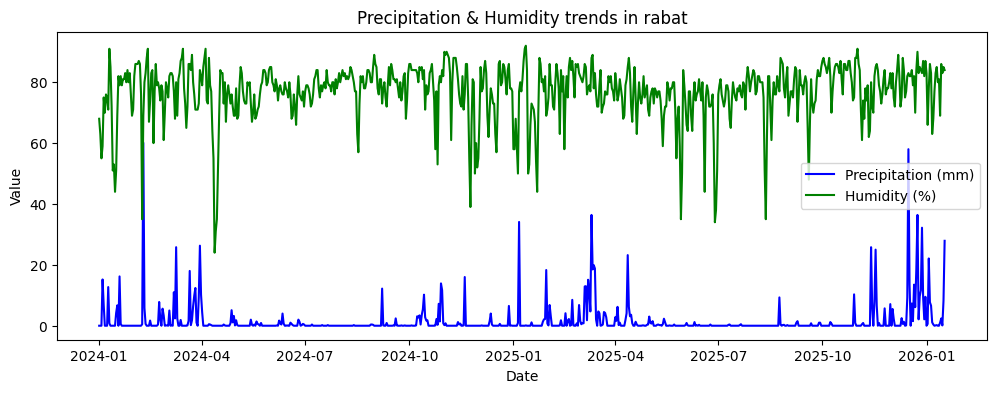

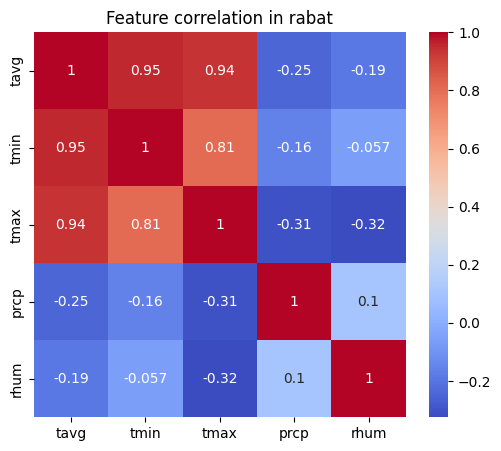

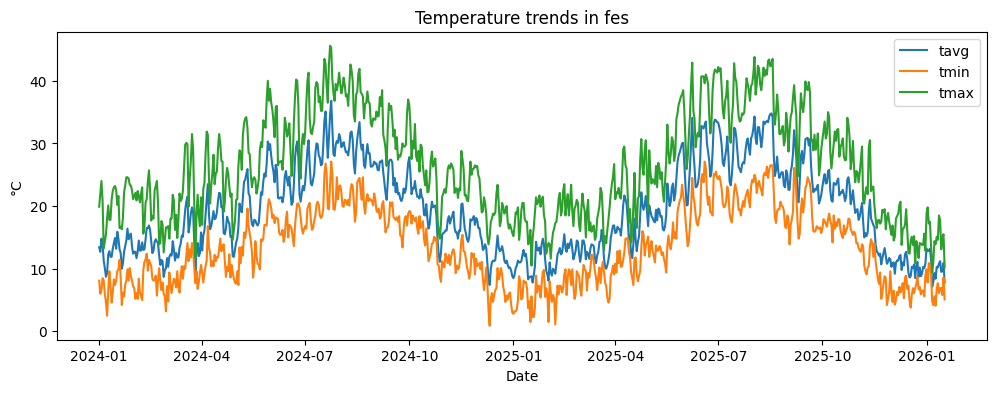

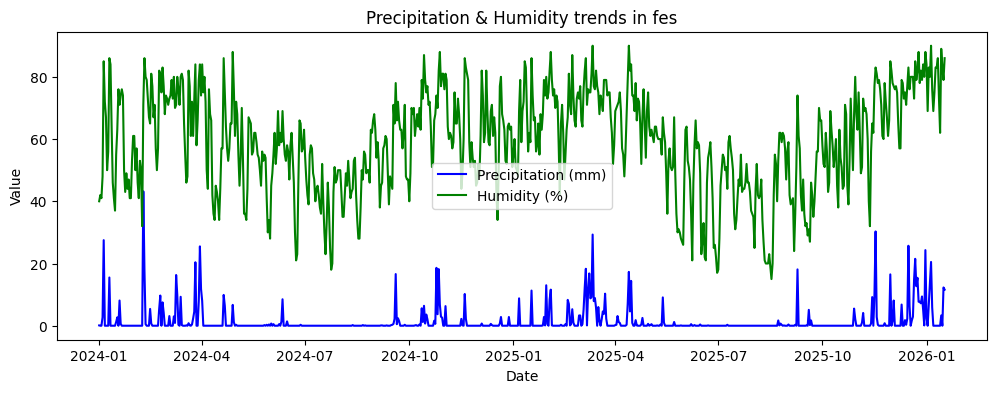

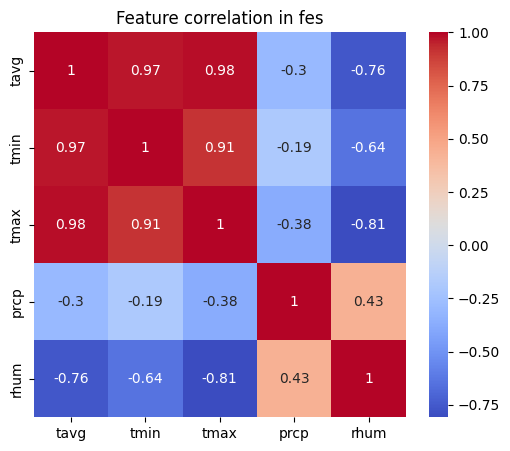

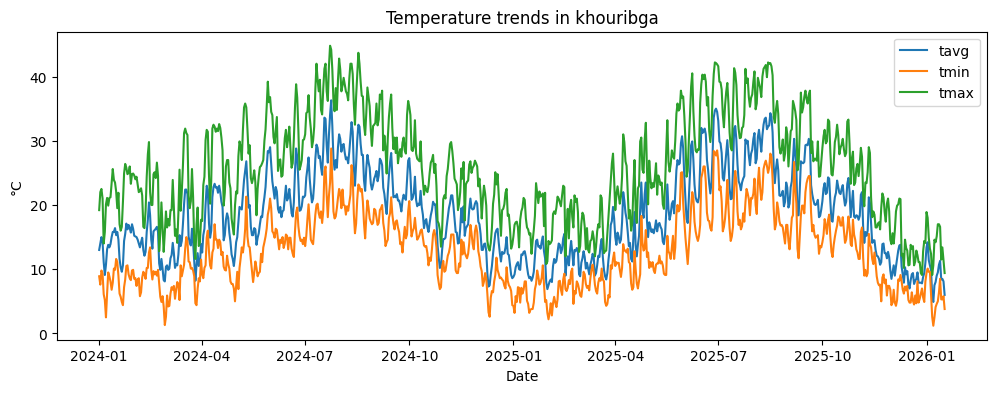

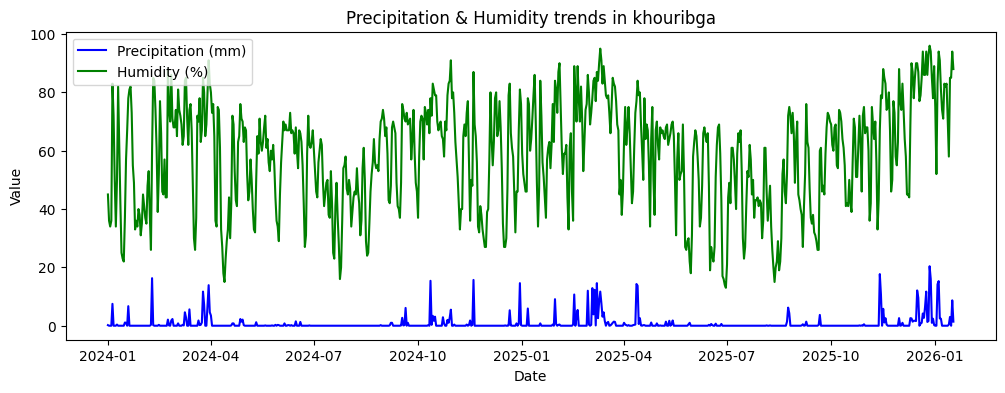

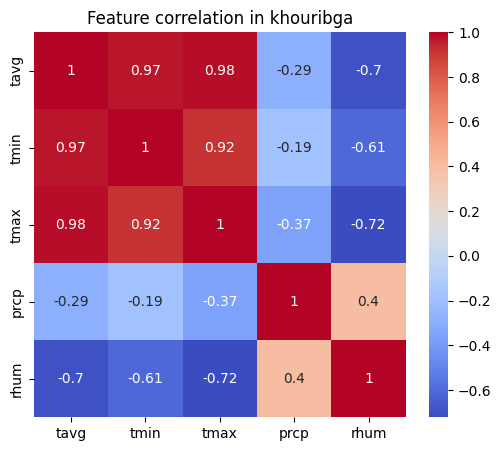

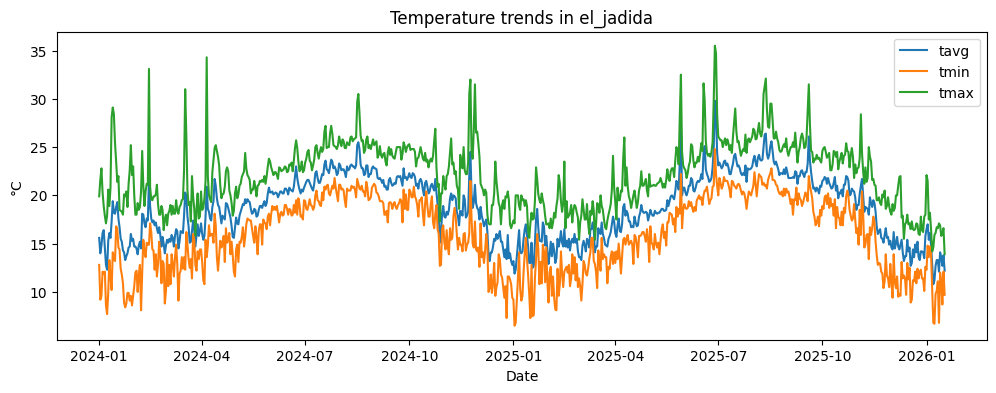

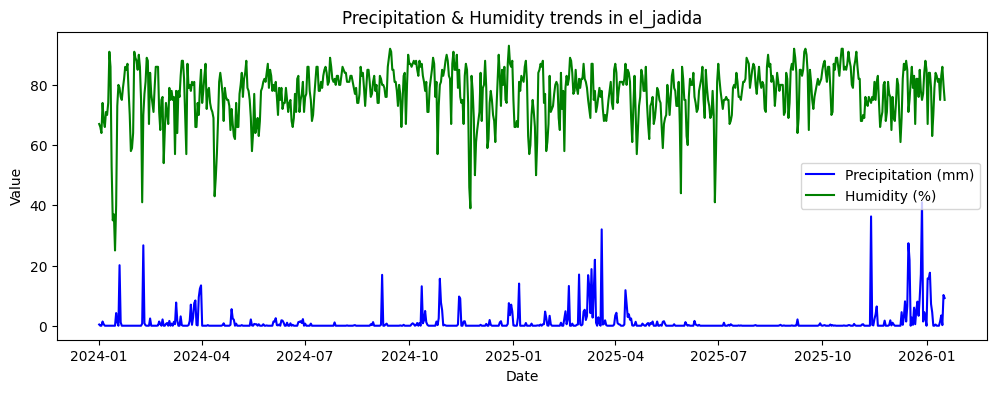

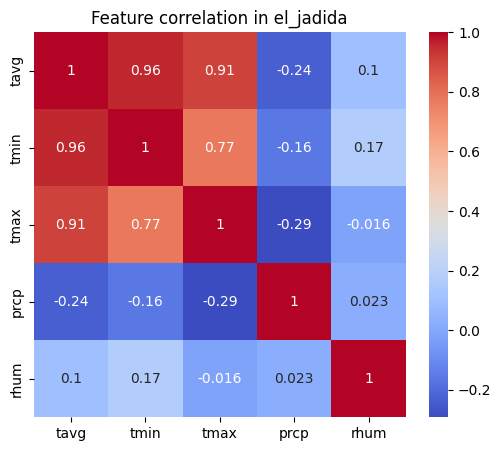

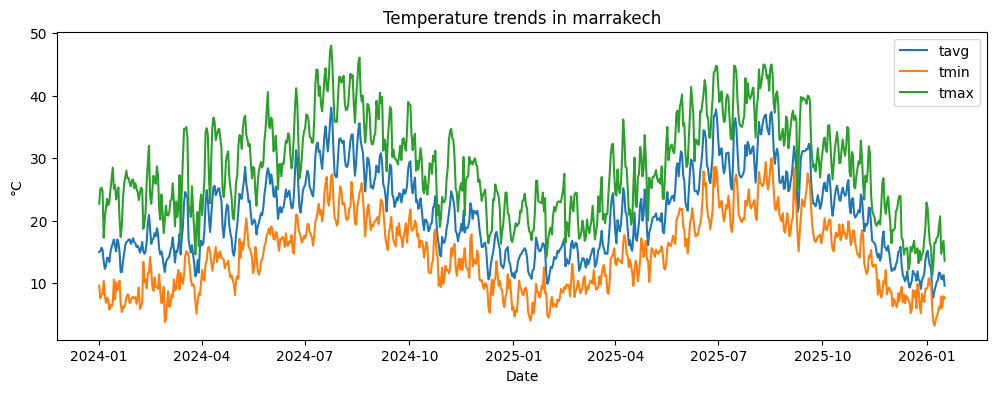

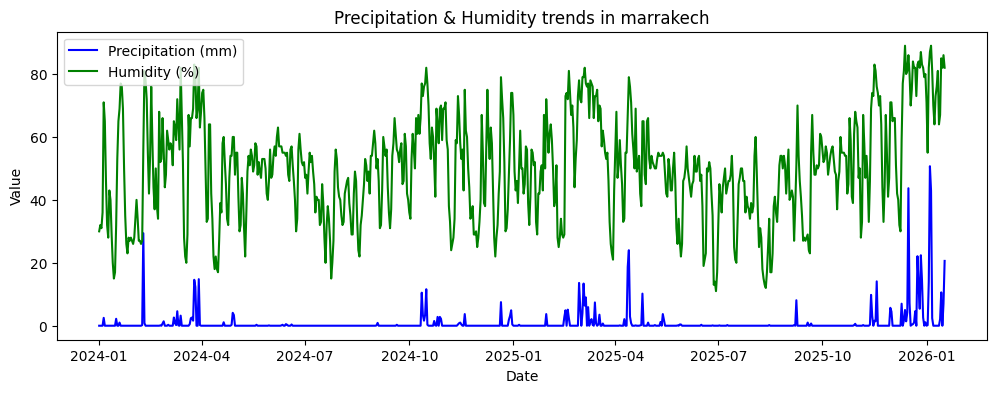

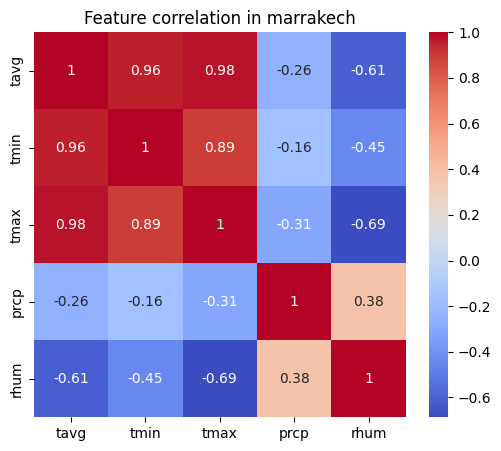

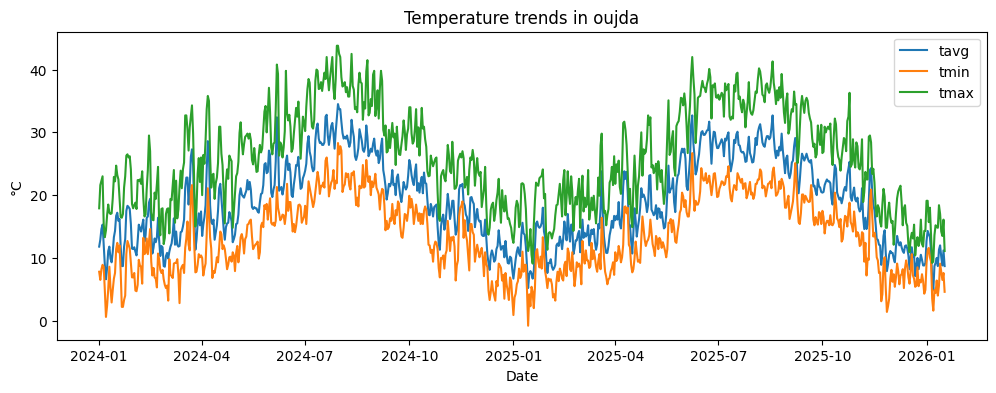

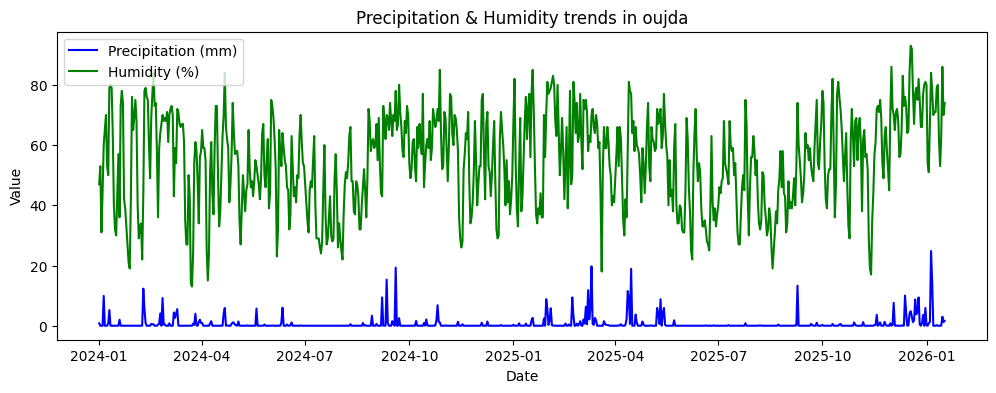

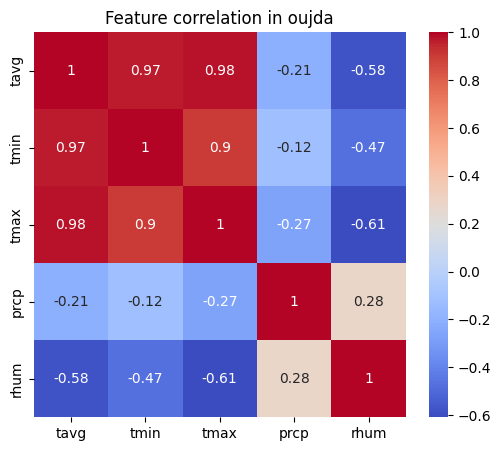

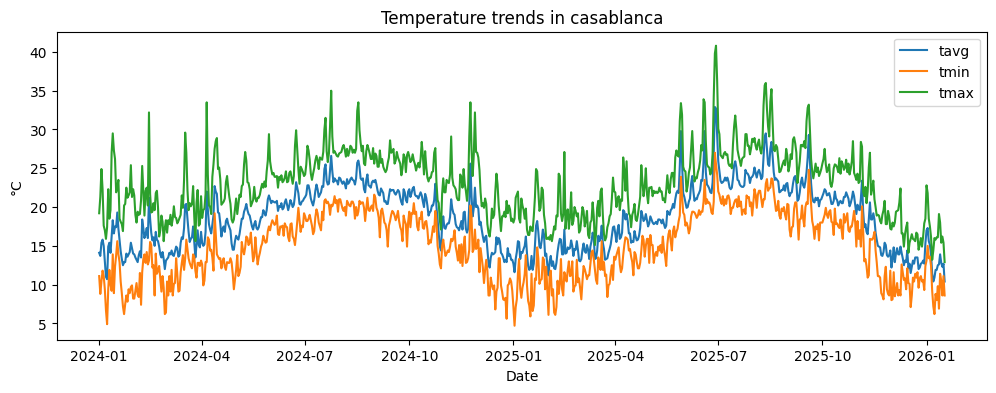

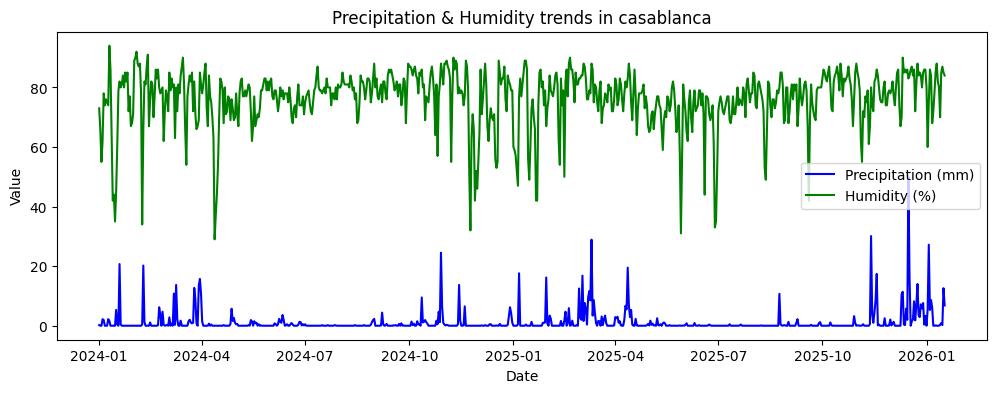

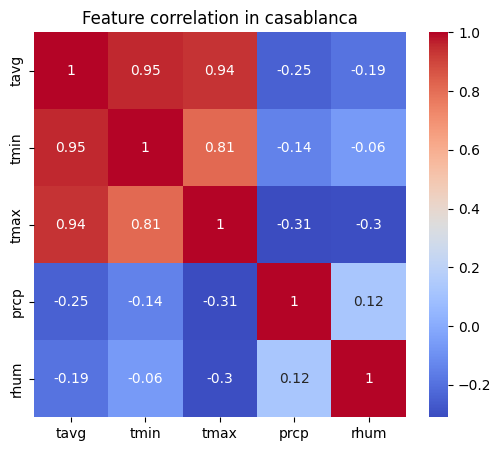

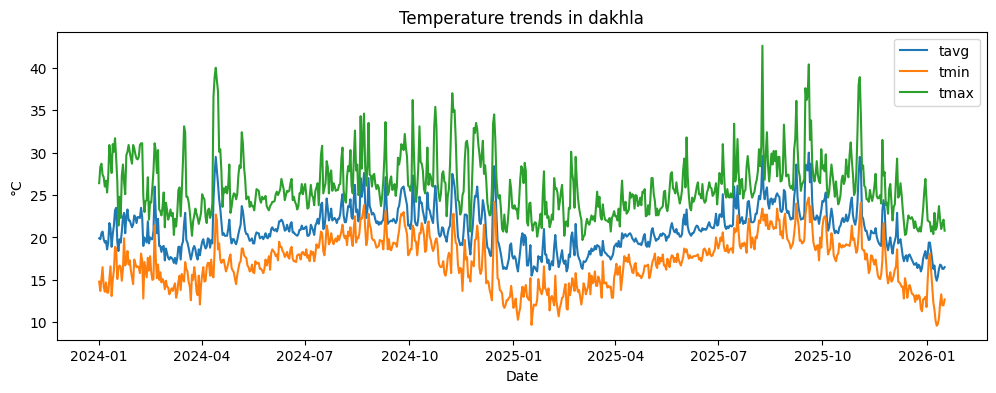

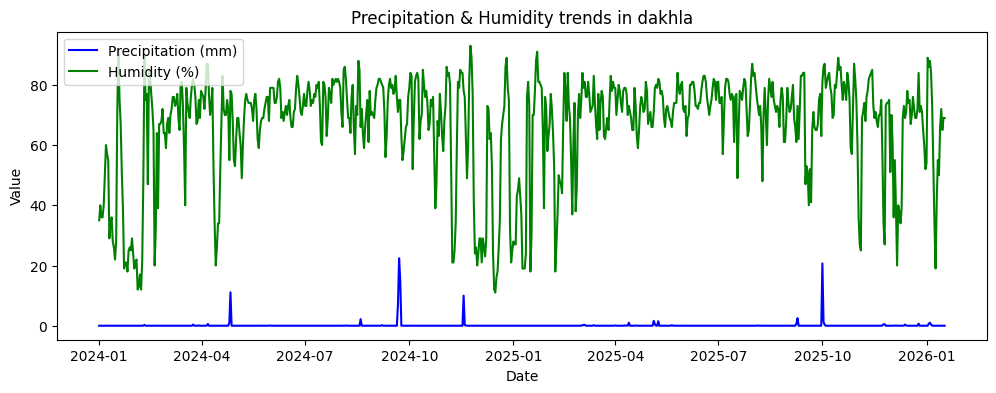

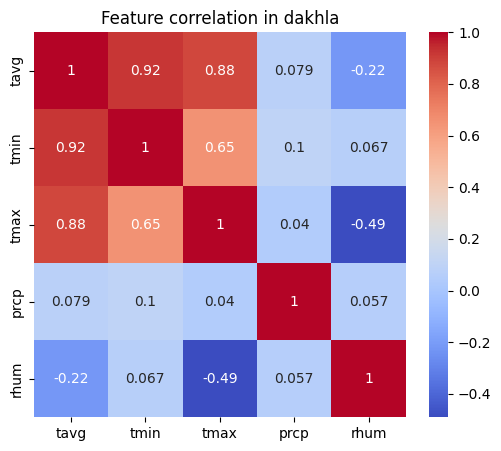

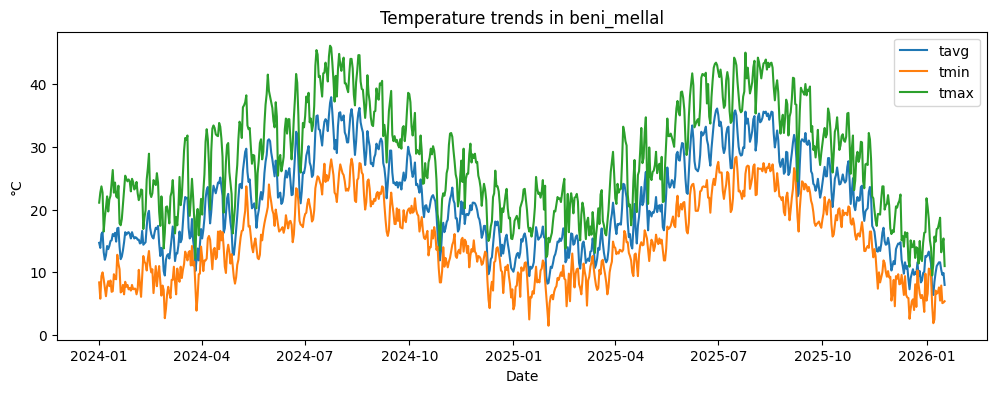

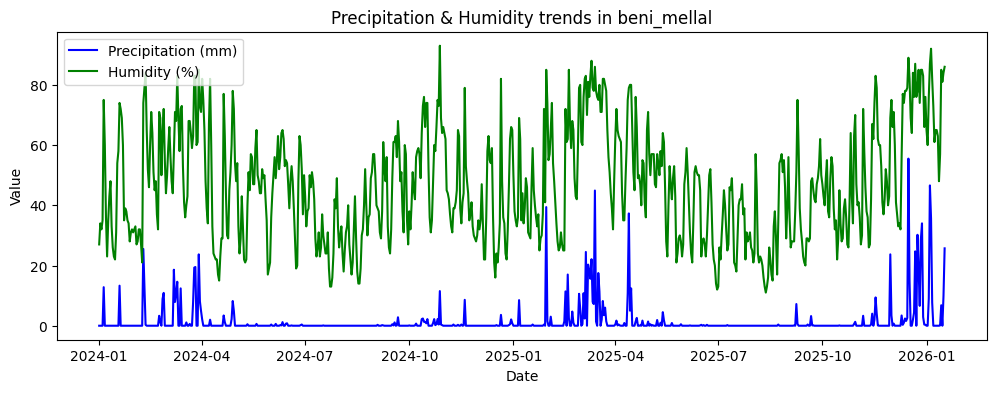

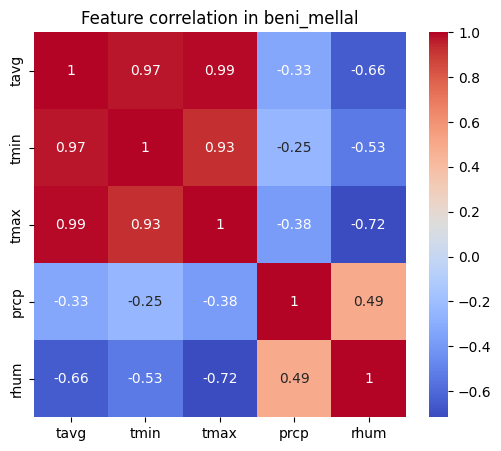

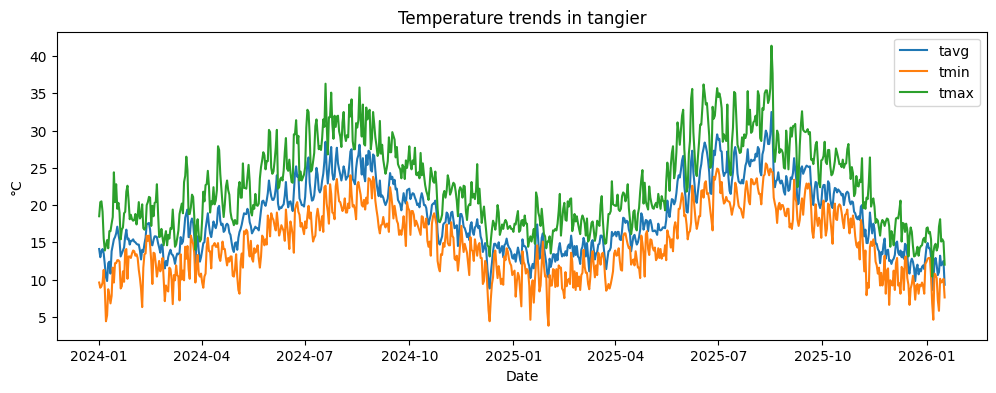

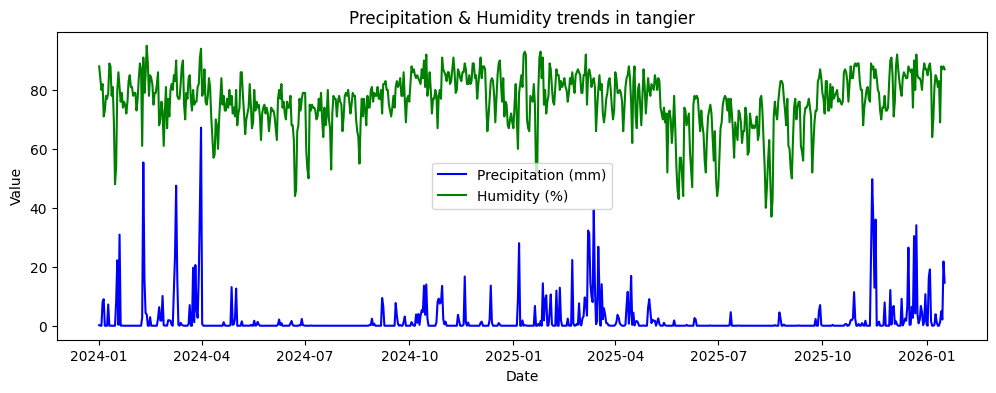

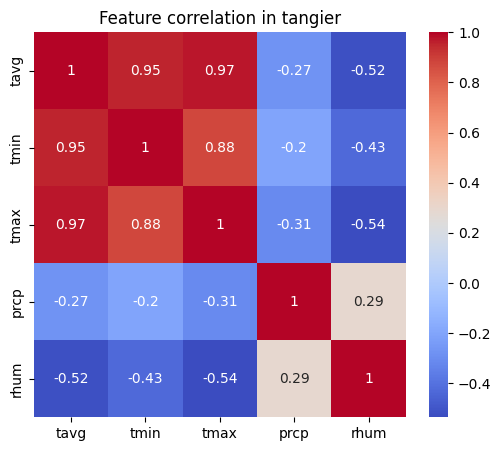

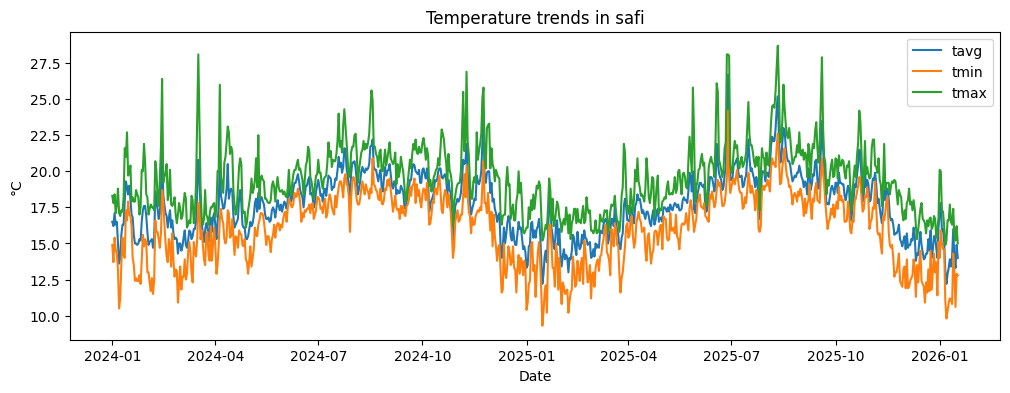

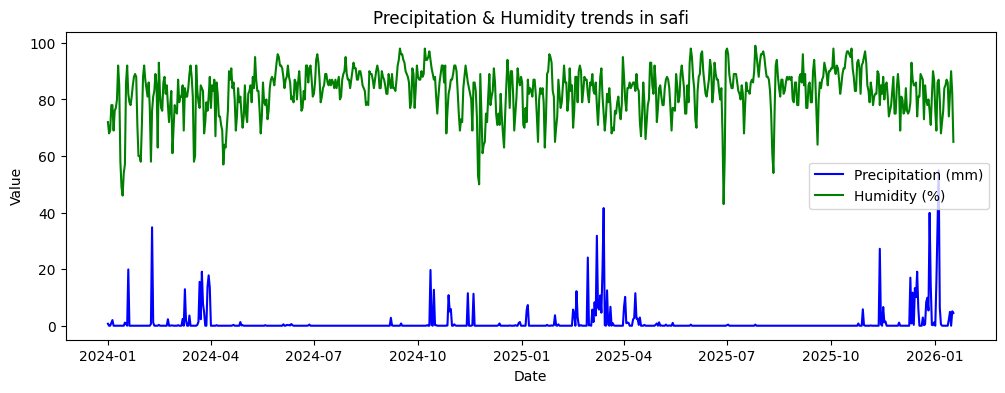

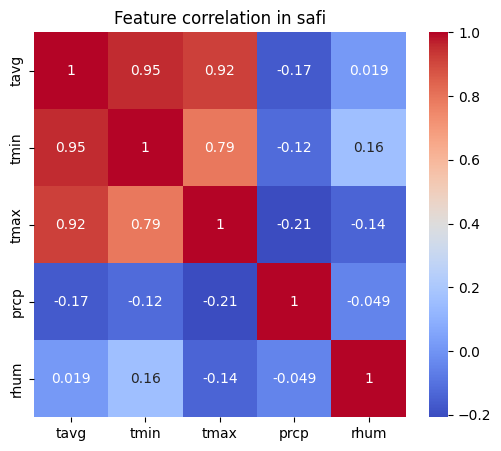

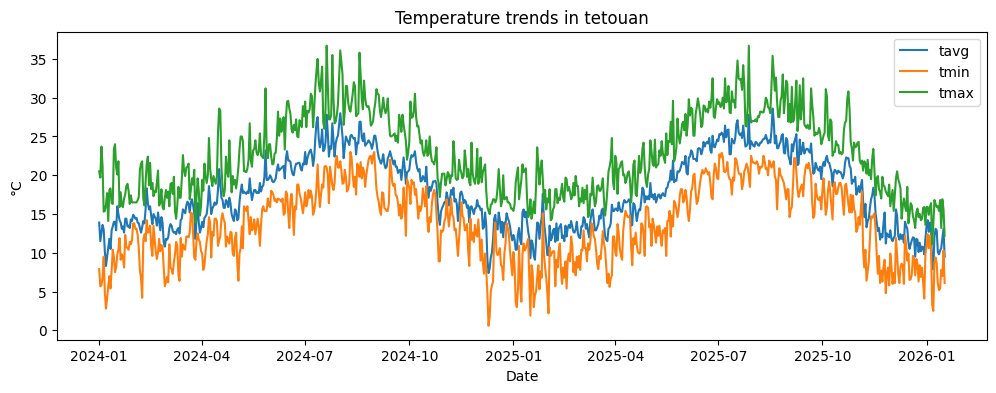

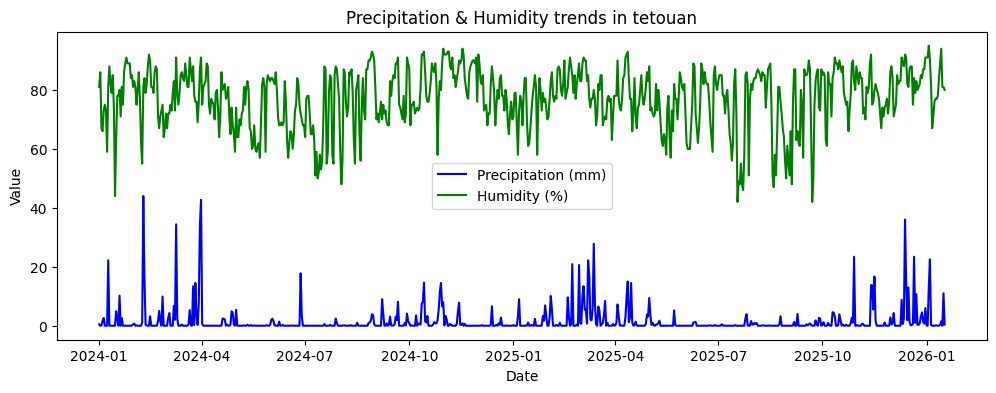

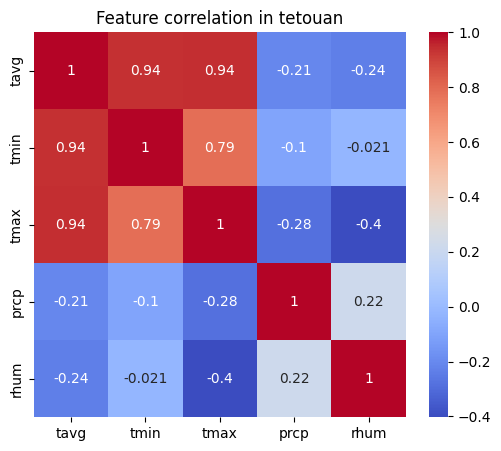

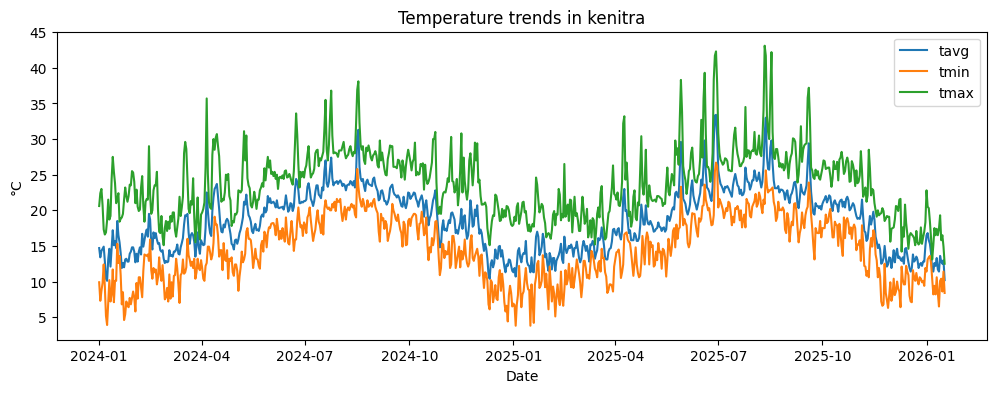

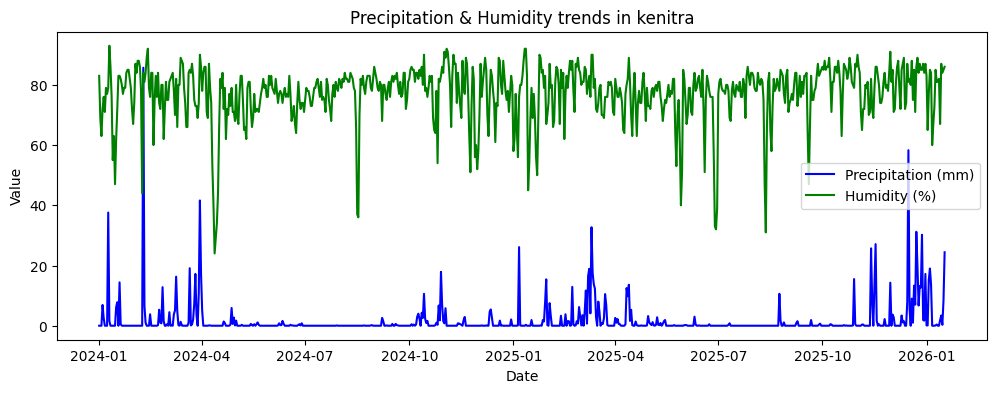

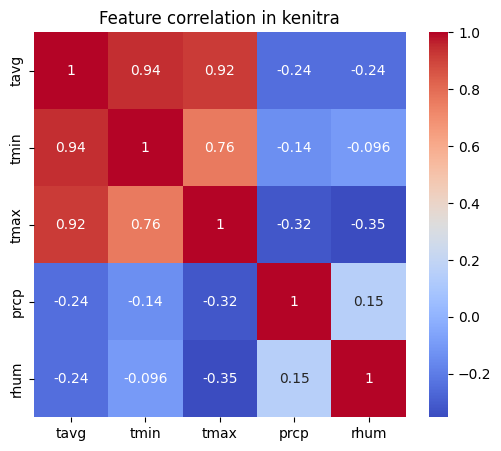

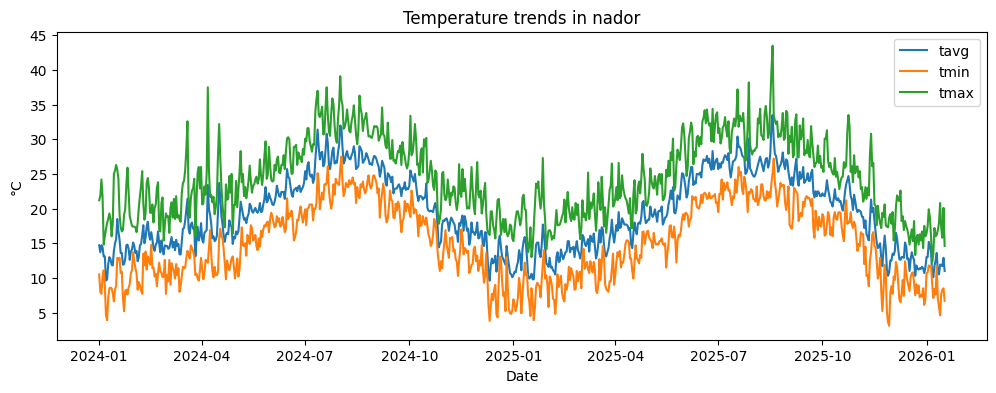

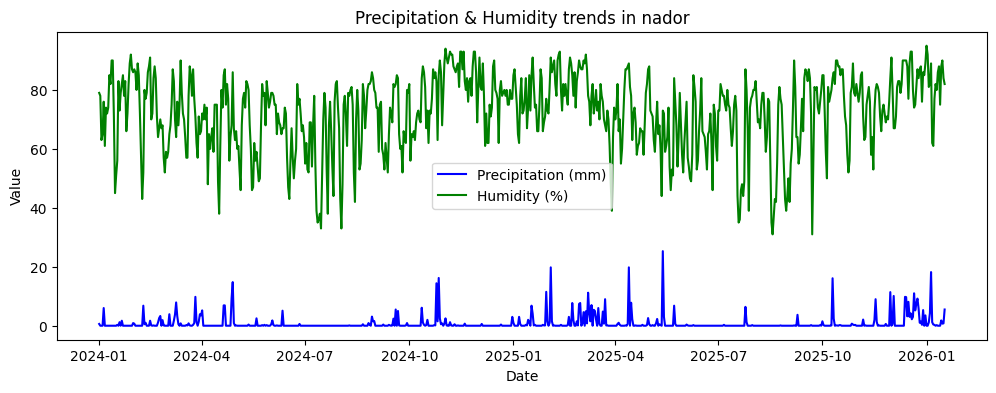

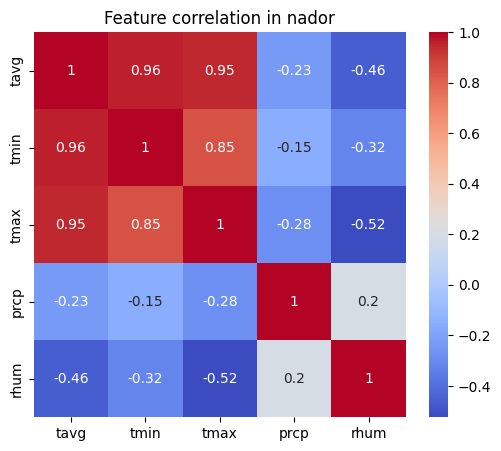

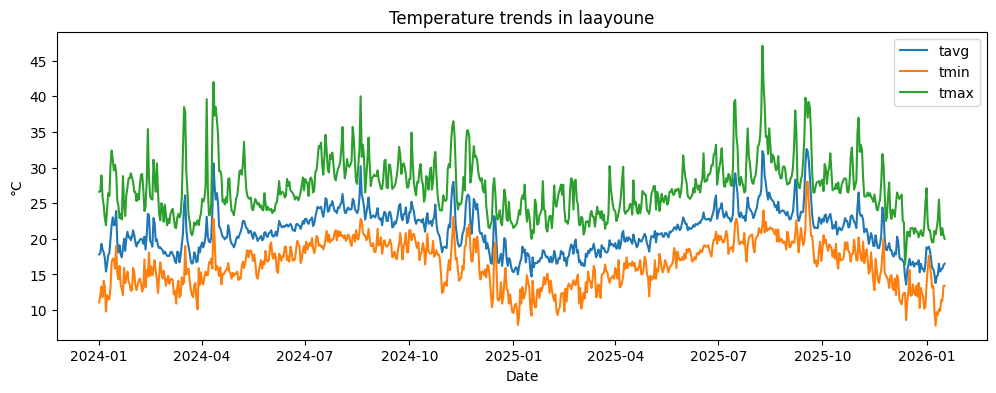

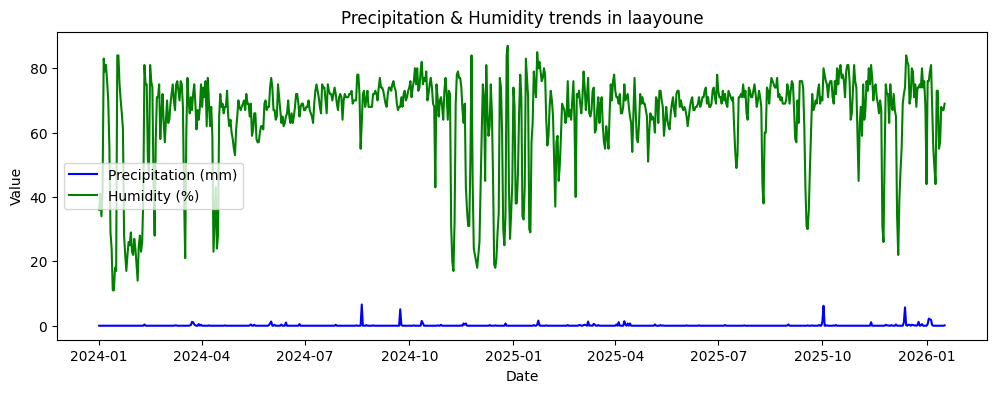

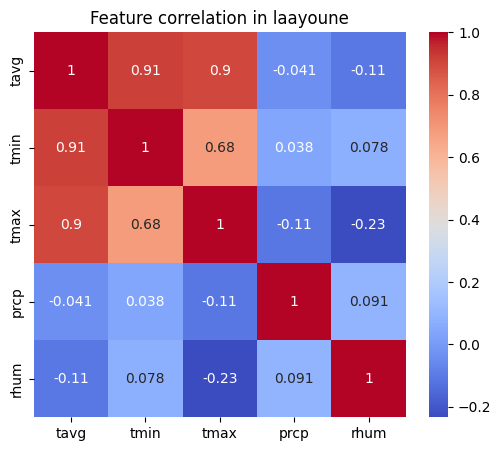

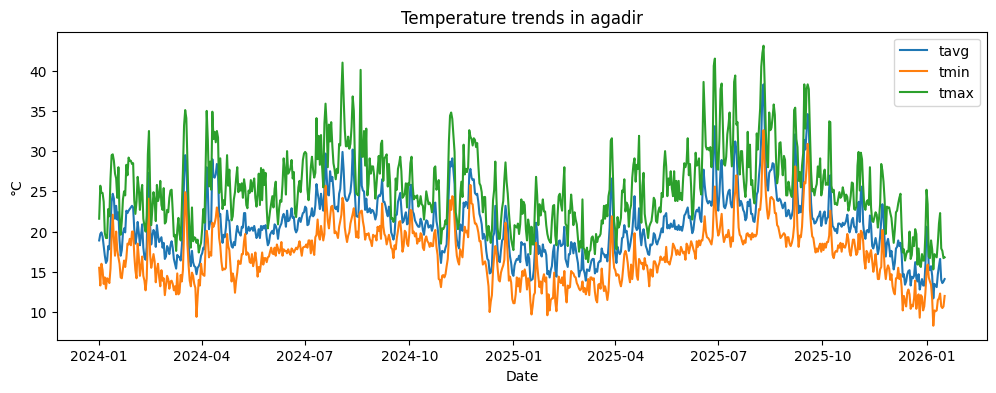

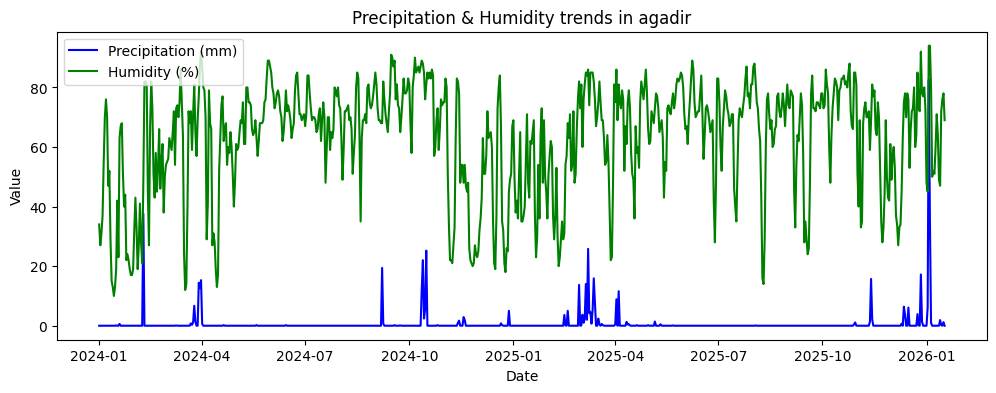

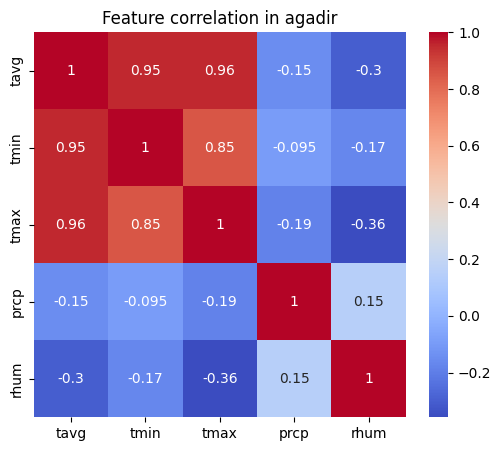

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

features_temp = ["tavg", "tmin", "tmax"]
features_env = ["prcp", "rhum"]

for city_file in os.listdir("datasets"):
    if not city_file.endswith(".csv"):
        continue
    city = city_file.replace(".csv", "")

    df = pd.read_csv(f"datasets/{city_file}")
    df['date'] = pd.to_datetime(df['date'])

    # --- Temperature trends ---
    plt.figure(figsize=(12,4))
    for f in features_temp:
        plt.plot(df['date'], df[f], label=f)
    plt.title(f"Temperature trends in {city}")
    plt.xlabel("Date")
    plt.ylabel("°C")
    plt.legend()
    plt.show()

    # --- Precipitation & Humidity trends ---
    plt.figure(figsize=(12,4))
    plt.plot(df['date'], df['prcp'], label="Precipitation (mm)", color='b')
    plt.plot(df['date'], df['rhum'], label="Humidity (%)", color='g')
    plt.title(f"Precipitation & Humidity trends in {city}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    # --- Correlation heatmap ---
    plt.figure(figsize=(6,5))
    sns.heatmap(df[["tavg","tmin","tmax","prcp","rhum"]].corr(), annot=True, cmap="coolwarm")
    plt.title(f"Feature correlation in {city}")
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Zip the datasets folder
shutil.make_archive("datasets", 'zip', "datasets")
shutil.make_archive("models", 'zip', "models")
shutil.make_archive("scalers", 'zip', "scalers")


'/content/scalers.zip'